In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import re
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/gabiuas/Ciencia dos Dados/Projeto 3 Cidados


In [2]:
#Complete
complete = pd.read_csv('CompleteDataset.csv',sep=',')
#Complete
atribute = pd.read_csv('PlayerAttributeData.csv',sep=',')
#Complete
personal = pd.read_csv('PlayerPersonalData.csv',sep=',')
#Complete
position = pd.read_csv('PlayerPlayingPositionData.csv',sep=',')

/Users/gabiuas/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/gabiuas/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#list(complete)

In [4]:
eu= pd.DataFrame({"Name":complete.Name})

In [5]:
eu["Preferred Positions"] = complete["Preferred Positions"]
eu["Long shots"] = complete["Long shots"]
eu["Finishing"] = complete["Finishing"]
eu["Short passing"] = complete["Short passing"]
eu["Ball control"] = complete["Ball control"]
eu["Dribbling"] = complete["Dribbling"]
eu["Long passing"] = complete["Long passing"]
eu["Interceptions"] = complete["Interceptions"]
eu["Marking"] = complete["Marking"]
eu["Standing tackle"] = complete["Standing tackle"]
eu["Sliding tackle"] = complete["Sliding tackle"]

In [6]:
eu = eu.fillna(0)  

In [7]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]
J=[]

a=len(eu["Name"])

for e in range(a):
    A.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Long shots"][e]))))
    B.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Finishing"][e]))))
    C.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Short passing"][e]))))
    D.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Ball control"][e]))))
    E.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Dribbling"][e]))))
    F.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Long passing"][e]))))
    G.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Interceptions"][e]))))
    H.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Marking"][e]))))
    I.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Standing tackle"][e]))))
    J.append((sum(int(x) for x in re.findall(r'[0-9]+', eu["Sliding tackle"][e]))))
    
    
eu["Long shots"] = pd.Series(A)
eu["Finishing"] = pd.Series(B)
eu["Short passing"] = pd.Series(C)
eu["Ball control"] = pd.Series(D)
eu["Dribbling"] = pd.Series(E)
eu["Long passing"] = pd.Series(F)
eu["Interceptions"] = pd.Series(G)
eu["Marking"] = pd.Series(H)
eu["Standing tackle"] = pd.Series(I)
eu["Sliding tackle"] = pd.Series(J)

In [8]:
ataque=[]
for e in range(a):
    ataq=((eu["Long shots"][e]+eu["Finishing"][e]+eu["Short passing"][e]+eu["Ball control"][e]+eu["Dribbling"][e]+eu["Long passing"][e])/6)
    ataque.append(ataq)


In [9]:
defesa=[]
for e in range(a):
    defe=((eu["Interceptions"][e]+eu["Marking"][e]+eu["Standing tackle"][e]+eu["Sliding tackle"][e])/4)
    defesa.append(defe)


In [10]:
eu["ATAQUE"] = pd.Series(ataque)
eu["DEFESA"] = pd.Series(defesa)

In [11]:
JoA=[]
JoD=[]

for e in range(a):
    if "RAM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    if "CAM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    if "LAM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    if "RCM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    if "CM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    if "LCM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    if "RM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    if "LM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    if "RDM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    if "CDM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])
    if "LDM" in eu['Preferred Positions'][e]:
        JoA.append(eu["ATAQUE"][e])
        JoD.append(eu["DEFESA"][e])

In [12]:
from sklearn.cluster import KMeans

In [13]:
X=list(zip(JoD, JoA))

In [14]:
km = KMeans(n_clusters=3)

In [15]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
C = km.cluster_centers_
La = km.labels_
colors=['b.','r.','g.']

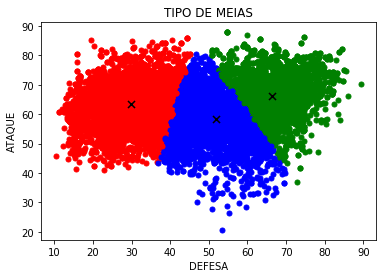

In [34]:
for e in range(len(X)):
    plt.plot(X[e][0],X[e][1], colors[La[e]], markersize = 10)
plt.scatter(C[0][0],C[0][1], c='black', marker='x', s=50, linewidths=5, zorder=10 )
plt.scatter(C[1][0],C[1][1], c='black', marker='x', s=50, linewidths=5, zorder=10 )
plt.scatter(C[2][0],C[2][1], c='black', marker='x', s=50, linewidths=5, zorder=10 )
plt.xlabel('DEFESA')
plt.ylabel('ATAQUE')
plt.title('TIPO DE MEIAS')
plt.show()